In [1]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

In [2]:
# # 한글폰트
# if platform.system()=='Windows':
#     plt.rc('font',family='Malgun Gothic')
# else:
#     plt.rc('font',family='AppleGothic')

In [3]:
# # 흑백으로 로테이션
# rota_save('L','blwh')

# # rgb로 로테이션
# rota_save('RGB','rgb')

In [4]:
# # 크롤링 데이터 convert 함수
# def data_con(color,foldname):
#     for file in os.listdir('./data/'):
#         img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [5]:
# # 원본사진 흑백으로
# data_con('L','blwh')

# # 원본사진 색깔로
# data_con('RGB','rgb')

In [6]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [7]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./trashdata'+charname):
        os.makedirs('./trashdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./trashdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./trashdata'+charname):
        Image.open('./trashdata'+charname+'/'+png).resize((50,50)).save('./trashdata'+charname+'/'+png)

In [8]:
# 메탈 쓰레기
image_save('https://www.google.com/search?q=%EB%A9%94%ED%83%88%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYgMTaD8UrBJjZcoXB0ejjjZXE0og:1667533346124&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiisPzlzZP7AhXaNt4KHdZ5DHUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5','metal')

# 유리 쓰레기
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsaq14G6Dozn2OoZypk41jDZtJOT7g:1667533415257&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjh-PeGzpP7AhVcl1YBHd5eDegQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'glass')

# 종이 쓰레기
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYC9L5qJdGyqmMqqjakLIj1HulBow:1667533460827&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiHrNWczpP7AhUGmFYBHVyVBTUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'paper')

# 플라스틱 쓰레기
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsbGqKr6AF6F6TpdksGB2H7Kl3qI1A:1667533505972&source=lnms&tbm=isch&sa=X&ved=2ahUKEwit0JiyzpP7AhXfrlYBHZSfAi0Q_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'plastic')

# 음식물 쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYd6U9ofgUrESbI6v60-pYMq5hkfQ:1667533565760&source=lnms&tbm=isch&sa=X&ved=2ahUKEwix5tnOzpP7AhVSm1YBHc5wBuQQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'food')

# 건전지 쓰레기
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsb6pS2n5n6mUXzgnSm8ZcFzlaL-SQ:1667533619052&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi2zY7ozpP7AhW_plYBHcylCLMQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'battery')

In [9]:
def rota_save_bw(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [10]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save_co(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [11]:
# # 크롤링 데이터 로테이션시키는 함수
# def rota_save(color,foldname,data):
#     # 폴더 만들기
#     if not os.path.exists('./'+foldname):
#         os.makedirs(foldname)
    
#     rotation=[45,90,135,180,225,270,315]
#     for file in os.listdir('./'+data+'/'):
#         for rot in rotation:
#             img=np.array(Image.open('./'+file).convert(color))
#             rows,cols = img.shape[0:2]
#             ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
#             ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
#             # 이미지 저장
#             filename=f"{file}_ro{str(rot)}"
#             cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [12]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [17]:
# 흑백으로 로테이션
rota_save_bw('L','blwh','trashdatametal')
rota_save_bw('L','blwh','trashdataglass')
rota_save_bw('L','blwh','trashdatapaper')
rota_save_bw('L','blwh','trashdataplastic')
rota_save_bw('L','blwh','trashdatafood')
rota_save_bw('L','blwh','trashdatabattery')

In [14]:
# # 원본사진 흑백으로
# data_con('L','blwh')

In [18]:
# rgb로 로테이션
rota_save_co('RGB','rgb','trashdatametal')
rota_save_co('RGB','rgb','trashdataglass')
rota_save_co('RGB','rgb','trashdatapaper')
rota_save_co('RGB','rgb','trashdataplastic')
rota_save_co('RGB','rgb','trashdatafood')
rota_save_co('RGB','rgb','trashdatabattery')

In [21]:
# # 원본사진 색깔로
# data_con('RGB','rgb','trashdatametal')
# data_con('RGB','rgb','trashdataglass')
# data_con('RGB','rgb','trashdatapaper')
# data_con('RGB','rgb','trashdataplastic')
# data_con('RGB','rgb','trashdatafood')
# data_con('RGB','rgb','trashdatabattery')

In [22]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50*50)[0].tolist()
        else:
            n_list=n.reshape(-1,50*50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [23]:
blwh=solution('blwh')
blwh

array([[0.08235294, 0.48235294, 0.70588235, ..., 0.62352941, 0.71372549,
        0.79607843],
       [0.77647059, 0.72941176, 0.56862745, ..., 0.40392157, 0.37647059,
        0.38039216],
       [0.00784314, 0.04705882, 0.09803922, ..., 0.35686275, 0.35294118,
        0.34901961],
       ...,
       [0.36862745, 0.32156863, 0.27843137, ..., 0.09803922, 0.24705882,
        0.44313725],
       [0.4745098 , 0.49803922, 0.52156863, ..., 0.50980392, 0.35686275,
        0.22352941],
       [0.24313725, 0.2       , 0.35294118, ..., 0.58039216, 0.58039216,
        0.34901961]])

In [24]:
print(f"흑백 사진 데이터 모양 {blwh.shape}")

흑백 사진 데이터 모양 (1120, 2500)


In [25]:
rgb=solution('rgb')
rgb

array([[[0.08627451, 0.08235294, 0.08235294],
        [0.49803922, 0.47843137, 0.45882353],
        [0.73333333, 0.70196078, 0.6627451 ],
        ...,
        [0.6       , 0.63137255, 0.63529412],
        [0.71372549, 0.71764706, 0.70196078],
        [0.81960784, 0.79215686, 0.74901961]],

       [[0.77647059, 0.77647059, 0.76078431],
        [0.72156863, 0.7372549 , 0.71372549],
        [0.54117647, 0.58431373, 0.55294118],
        ...,
        [0.4       , 0.41568627, 0.34901961],
        [0.39215686, 0.37254902, 0.34509804],
        [0.39215686, 0.38039216, 0.35294118]],

       [[0.00784314, 0.00784314, 0.01176471],
        [0.05490196, 0.04705882, 0.05882353],
        [0.08627451, 0.10588235, 0.09411765],
        ...,
        [0.38039216, 0.34901961, 0.34117647],
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.37254902, 0.34117647, 0.33333333]],

       ...,

       [[0.36078431, 0.37254902, 0.36078431],
        [0.34117647, 0.31764706, 0.30196078],
        [0.29803922, 0

In [26]:
print(f"컬러 사진 데이터 모양 {rgb.shape}")

컬러 사진 데이터 모양 (1120, 2500, 3)


In [27]:
rgb

array([[[0.08627451, 0.08235294, 0.08235294],
        [0.49803922, 0.47843137, 0.45882353],
        [0.73333333, 0.70196078, 0.6627451 ],
        ...,
        [0.6       , 0.63137255, 0.63529412],
        [0.71372549, 0.71764706, 0.70196078],
        [0.81960784, 0.79215686, 0.74901961]],

       [[0.77647059, 0.77647059, 0.76078431],
        [0.72156863, 0.7372549 , 0.71372549],
        [0.54117647, 0.58431373, 0.55294118],
        ...,
        [0.4       , 0.41568627, 0.34901961],
        [0.39215686, 0.37254902, 0.34509804],
        [0.39215686, 0.38039216, 0.35294118]],

       [[0.00784314, 0.00784314, 0.01176471],
        [0.05490196, 0.04705882, 0.05882353],
        [0.08627451, 0.10588235, 0.09411765],
        ...,
        [0.38039216, 0.34901961, 0.34117647],
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.37254902, 0.34117647, 0.33333333]],

       ...,

       [[0.36078431, 0.37254902, 0.36078431],
        [0.34117647, 0.31764706, 0.30196078],
        [0.29803922, 0

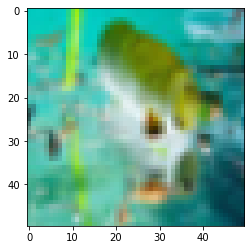

In [37]:
# 그래프 그려보기 => 컬러
plt.imshow(rgb[1100].reshape(50,50,3))

In [ ]:
# 흑백 그래프 그려보기 => 흑백
plt.imshow(rgb[768].reshape(50,50,3),cmap='gray')

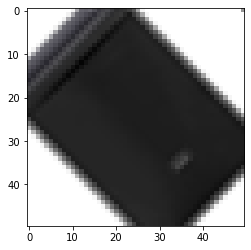

In [38]:
# 흑백 그래프 그려보기 => 흑백
plt.imshow(rgb[768].reshape(50,50,3),cmap='gray')

In [39]:
# 정규식을 활용한 브랜드 이름 분리
import re

brand_name=[]
for b in os.listdir('./rgb/'):
    l=re.split(r'[0-9]',b)[0]
    brand_name.append(l)
brand_name

['battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'ba

In [40]:
# 브랜드 이름/라벨로 타겟으로 저장
com_brand='angelinus'
i=0
target=[]
for brand in brand_name:
    if com_brand==brand:
        target.append([brand,i])
    else:
        i+=1
        com_brand=brand
        target.append([brand,i])

In [41]:
target_df=pd.DataFrame(target,columns=['name','label'])
target_df

,name,label
0,battery,1
1,battery,1
2,battery,1
3,battery,1
4,battery,1
...,...,...
1115,plastic,6
1116,plastic,6
1117,plastic,6
1118,plastic,6


In [94]:
target_df.iloc[1100,:]

name     plastic
label          6
Name: 1100, dtype: object

In [42]:
target_df.to_csv('target.csv')

In [44]:
# 수정된 타겟 데이터 불러오기
target_final_df=pd.read_csv('target.csv')
target=np.array(target_final_df.label)

In [45]:
print(f"타켓 데이터 모양 {target.shape}")

타켓 데이터 모양 (1120,)


In [46]:
# 브랜드 이름 고유값
brand=sorted(list(set(target_final_df.name)))
brand

['battery', 'food', 'glass', 'metal', 'paper', 'plastic']

In [59]:
# 흑백데이터 훈련/검증/테스트
train_x_bw,test_x_bw,train_y,test_y=train_test_split(blwh,target,random_state=42,test_size=0.2,stratify=target)
train_x_bw,val_x_bw,train_y,val_y=train_test_split(train_x_bw,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [60]:
print(f"train_x_bw {train_x_bw.shape}, train_y {train_y.shape}")
print(f"val_x_bw {val_x_bw.shape}, train_y {val_y.shape}")
print(f"test_x_bw {test_x_bw.shape}, train_y {test_y.shape}")

train_x_bw (716, 2500), train_y (716,)
val_x_bw (180, 2500), train_y (180,)
test_x_bw (224, 2500), train_y (224,)


In [64]:
rgb_fl=rgb.reshape(-1,2500*3)
rgb_fl.shape

(1120, 7500)

In [65]:
# 컬러데이터 훈련/검증/테스트
train_x_co,test_x_co,train_y,test_y=train_test_split(rgb_fl,target,random_state=42,test_size=0.2,stratify=target)
train_x_co,val_x_co,train_y,val_y=train_test_split(train_x_co,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [127]:
print(f"train_x_co {train_x_co.shape}, train_y {train_y.shape}")
print(f"val_x_co {val_x_co.shape}, val_y {val_y.shape}")
print(f"test_x_co {test_x_co.shape}, test_y {test_y.shape}")

train_x_co (716, 7500), train_y (716,)
val_x_co (180, 7500), val_y (180,)
test_x_co (224, 7500), test_y (224,)


In [67]:
from sklearn.decomposition import PCA

In [68]:
pca=PCA()

In [69]:
pca.fit(train_x_bw)

PCA()

In [71]:
# 분산비율
pca.explained_variance_ratio_

array([3.70123997e-01, 6.41066473e-02, 4.85036290e-02, 4.56105053e-02,
       2.96096311e-02, 2.41486748e-02, 1.51469263e-02, 1.43089182e-02,
       1.32511846e-02, 1.16077025e-02, 1.12921041e-02, 1.01619832e-02,
       9.60290290e-03, 8.49682861e-03, 8.18960116e-03, 7.73214092e-03,
       7.31896235e-03, 6.88930369e-03, 6.51835098e-03, 6.37716578e-03,
       6.04858391e-03, 5.78807077e-03, 5.53809536e-03, 5.42827930e-03,
       4.96028322e-03, 4.81602190e-03, 4.64408819e-03, 4.39574005e-03,
       4.30386462e-03, 4.21947291e-03, 3.99705363e-03, 3.81247030e-03,
       3.72637190e-03, 3.51287342e-03, 3.44610483e-03, 3.25478143e-03,
       3.21224402e-03, 3.12831940e-03, 3.06087006e-03, 3.01352055e-03,
       2.92432690e-03, 2.86754492e-03, 2.82291883e-03, 2.67230057e-03,
       2.63821885e-03, 2.58168240e-03, 2.55686213e-03, 2.51883557e-03,
       2.40311421e-03, 2.35370796e-03, 2.28407783e-03, 2.22384112e-03,
       2.12849991e-03, 2.06547294e-03, 2.05161566e-03, 2.00320325e-03,
      

In [72]:
# 설명력
cumsum=np.round(np.cumsum(pca.explained_variance_ratio_),4)
d=np.argmax(cumsum>=0.95)+1 # 최적 주성분 개수

print(f"주성분 누적 설명정도 {cumsum}")
print(f"주성분 개수(차원): {d}")

주성분 누적 설명정도 [0.3701 0.4342 0.4827 0.5283 0.558  0.5821 0.5973 0.6116 0.6248 0.6364
 0.6477 0.6579 0.6675 0.676  0.6842 0.6919 0.6992 0.7061 0.7126 0.719
 0.725  0.7308 0.7364 0.7418 0.7468 0.7516 0.7562 0.7606 0.7649 0.7691
 0.7731 0.7769 0.7807 0.7842 0.7876 0.7909 0.7941 0.7972 0.8003 0.8033
 0.8062 0.8091 0.8119 0.8146 0.8172 0.8198 0.8224 0.8249 0.8273 0.8296
 0.8319 0.8342 0.8363 0.8383 0.8404 0.8424 0.8443 0.8463 0.8482 0.85
 0.8519 0.8537 0.8555 0.8572 0.8589 0.8606 0.8622 0.8638 0.8654 0.8669
 0.8684 0.8699 0.8714 0.8728 0.8742 0.8756 0.8769 0.8783 0.8796 0.8809
 0.8822 0.8834 0.8847 0.8859 0.8871 0.8883 0.8894 0.8905 0.8916 0.8928
 0.8938 0.8949 0.896  0.897  0.8981 0.8991 0.9001 0.9011 0.9021 0.9031
 0.904  0.905  0.9059 0.9069 0.9078 0.9087 0.9096 0.9105 0.9114 0.9123
 0.9131 0.914  0.9148 0.9156 0.9164 0.9172 0.918  0.9188 0.9196 0.9203
 0.9211 0.9218 0.9226 0.9233 0.924  0.9247 0.9254 0.9261 0.9268 0.9275
 0.9282 0.9289 0.9295 0.9302 0.9308 0.9315 0.9321 0.9327 0.9333 0.93

In [74]:
# # 설명력 그래프 그려보기
# plt.figure(figsize=(15,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.xlabel('Dimention')
# plt.ylabel('Explained Variance')
# plt.show()

In [75]:
# 최적의 주성분 개수로 다시 모델 생성
pca=PCA(n_components=d)
pca.fit(train_x_bw)

PCA(n_components=172)

In [76]:
# 주성분 개수 마다 모델과 예측값 구하기 함수
def pca_pre(n_pca,data):
    pca=PCA(n_components=n_pca)
    pca.fit(train_x_bw)
    pre_out=pca.transform(data)

    return pca, pre_out

In [77]:
# 원본데이터와 예측데이터의 그래프 비교 함수
def compimage(mopca,raw,comp):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.imshow(raw.reshape(50,50,1),cmap='gray')
    plt.title('원본데이터')
    
    re_comp=mopca.inverse_transform(comp)
    plt.subplot(1,2,2)
    plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
    plt.title('PCA된 그림')
    plt.tight_layout()
    plt.show()

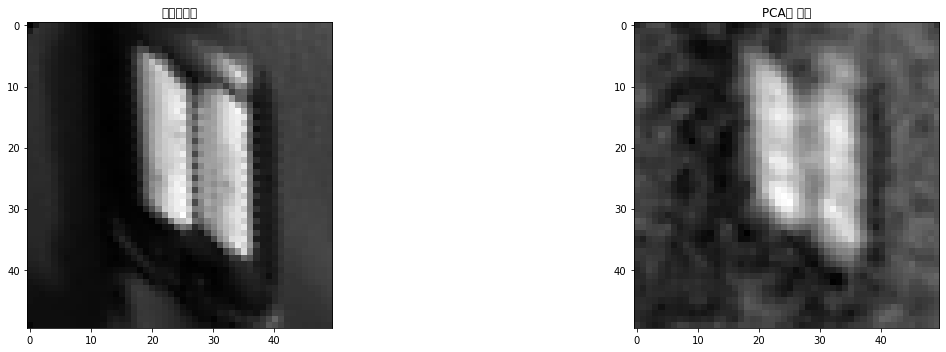

In [78]:
mopca,comp=pca_pre(d,test_x_bw)
compimage(mopca,test_x_bw[1],comp[1])

In [79]:
# 주성분 개수마다 그래프 그려보기
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,1),cmap='gray')
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_bw)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [96]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[0]]}")
# pca_grape([1,30,40,50,100,200,500,834,1000,2000],test_x_bw,0)

In [97]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[100]]}")
# pca_grape([1,25,60,100,200,345,567,834,900,2500],test_x_bw,100)

## 컬러

In [83]:
pcacolor=PCA()

In [84]:
pcacolor.fit(train_x_co)

PCA()

In [85]:
# 누적 설명력과 최적 차원개수 구하기
cumsum_co=np.round(np.cumsum(pcacolor.explained_variance_ratio_),6)
d=np.argmax(cumsum_co>=0.95)+1

print(f"누적 설명력은 {cumsum_co}")
print(f"최적의 차원 개수는 {d}입니다.")

누적 설명력은 [0.327986 0.387369 0.431969 0.474348 0.505081 0.531794 0.554232 0.568168
 0.581007 0.592863 0.603568 0.61409  0.623425 0.632021 0.640055 0.64782
 0.655054 0.661741 0.668357 0.674696 0.680892 0.686862 0.692608 0.698217
 0.703551 0.70878  0.713796 0.718563 0.723095 0.727601 0.731925 0.736079
 0.740101 0.744018 0.74781  0.751417 0.754856 0.758208 0.761451 0.76461
 0.767668 0.77067  0.773581 0.776412 0.779204 0.781898 0.784539 0.787172
 0.789694 0.792136 0.794529 0.796888 0.799218 0.801498 0.803652 0.805773
 0.807865 0.809913 0.811916 0.813885 0.815847 0.817751 0.819607 0.821443
 0.82326  0.825032 0.82676  0.828465 0.830153 0.831812 0.833437 0.835033
 0.8366   0.838147 0.839654 0.841155 0.842625 0.844077 0.845525 0.846945
 0.848339 0.849715 0.85108  0.852419 0.853738 0.855036 0.856305 0.85756
 0.858798 0.860035 0.861243 0.862443 0.863615 0.864782 0.865935 0.867073
 0.8682   0.869307 0.870405 0.871489 0.872564 0.873628 0.874676 0.875716
 0.876751 0.87778  0.878781 0.879774 0.880763 

In [87]:
# # 누적 설명력 그래프 그리기
# plt.figure(figsize=(20,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.show()

In [88]:
# 주성분 개수마다 그래프 그려보기 => 색깔
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,3))
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_co)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,3),vmin=0,vmax=1)
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [98]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[10]]}")
# pca_grape([1,10,59,167,540,900,2000,2300,2400,2450],test_x_co,62)

In [100]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras import layers,callbacks,Sequential

In [109]:
# # 사전 학습된 VGG16모델 불러오기
# model=VGG16(weights='imagenet',include_top=False,input_shape=(50,50,3))

In [110]:
# # 모델 확인
# model.summary(show_trainable=True)

In [111]:
# remodel = Sequential()
# remodel.add(model)
# remodel.add(layers.Flatten())
# remodel.add(layers.Dense(512,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(216,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(26, activation='softmax'))

In [112]:
# remodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [113]:
# modelES=callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
# modelMC=callbacks.ModelCheckpoint('best_model',save_best_only=True,save_weights_only=True)

In [114]:
# remodel.summary()

In [135]:
train_xx = train_x_co.reshape(-1,50,50,3)
test_xx = test_x_co.reshape(-1,50,50,3)
val_xx = val_x_co.reshape(-1,50,50,3)

In [123]:
train_xx.shape

(716, 50, 50, 3)

In [124]:
train_y.shape

(716,)

In [116]:
# remodel.fit(train_xx,train_y,callbacks=[modelES,modelMC],validation_data=(val_xx,val_y),epochs=100)

In [117]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 58)        1624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 58)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 100)       52300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [120]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(train_xx)

In [121]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [125]:
History1 = model.fit_generator(train_datagen.flow(train_xx,train_y, batch_size=32),
                              epochs = 100, validation_data = (val_xx,val_y),
                              verbose = 1, steps_per_epoch=train_xx.shape[0] // 32)

Epoch 1/100
22/22 [==============================] - 2s 73ms/step - loss: 2.1393 - accuracy: 0.1637 - val_loss: 1.6989 - val_accuracy: 0.3111
Epoch 2/100
22/22 [==============================] - 2s 67ms/step - loss: 1.6697 - accuracy: 0.2880 - val_loss: 1.5820 - val_accuracy: 0.3444
Epoch 3/100
22/22 [==============================] - 2s 71ms/step - loss: 1.5583 - accuracy: 0.3816 - val_loss: 1.4547 - val_accuracy: 0.3833
Epoch 4/100
22/22 [==============================] - 2s 74ms/step - loss: 1.4572 - accuracy: 0.4006 - val_loss: 1.4109 - val_accuracy: 0.4444
Epoch 5/100
22/22 [==============================] - 2s 75ms/step - loss: 1.4062 - accuracy: 0.4050 - val_loss: 1.3634 - val_accuracy: 0.4222
Epoch 6/100
22/22 [==============================] - 2s 76ms/step - loss: 1.3299 - accuracy: 0.4547 - val_loss: 1.3774 - val_accuracy: 0.4167
Epoch 7/100
22/22 [==============================] - 2s 80ms/step - loss: 1.3235 - accuracy: 0.4488 - val_loss: 1.3487 - val_accuracy: 0.4222
Epoch 

22/22 [==============================] - 3s 128ms/step - loss: 0.3193 - accuracy: 0.8918 - val_loss: 0.8067 - val_accuracy: 0.7056
Epoch 59/100
22/22 [==============================] - 3s 131ms/step - loss: 0.3016 - accuracy: 0.8889 - val_loss: 0.6331 - val_accuracy: 0.8167
Epoch 60/100
22/22 [==============================] - 3s 136ms/step - loss: 0.2647 - accuracy: 0.9020 - val_loss: 0.4241 - val_accuracy: 0.8500
Epoch 61/100
22/22 [==============================] - 3s 137ms/step - loss: 0.2652 - accuracy: 0.9050 - val_loss: 0.5077 - val_accuracy: 0.8167
Epoch 62/100
22/22 [==============================] - 3s 148ms/step - loss: 0.2814 - accuracy: 0.9064 - val_loss: 0.6354 - val_accuracy: 0.7611
Epoch 63/100
22/22 [==============================] - 3s 146ms/step - loss: 0.3110 - accuracy: 0.8772 - val_loss: 0.6779 - val_accuracy: 0.7611
Epoch 64/100
22/22 [==============================] - 3s 138ms/step - loss: 0.2703 - accuracy: 0.9079 - val_loss: 0.5821 - val_accuracy: 0.8333
Epoch

In [126]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [132]:
test_x_co.shape

(224, 7500)

In [133]:
test_y.shape

(224,)

In [137]:
model.evaluate(test_xx, test_y)

7/7 [==============================] - 0s 17ms/step - loss: 0.3702 - accuracy: 0.9018


[0.3701874911785126, 0.9017857313156128]

In [138]:
pre_y=model.predict(test_xx[30].reshape(-1, 50, 50, 3))

1/1 [==============================] - 0s 78ms/step


In [139]:
pre_y.round(2)

array([[0.  , 0.06, 0.01, 0.  , 0.48, 0.45, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [141]:
test_y[30]

4

In [ ]:
'./target.csv'

In [143]:
df = pd.DataFrame(target.name.unique())
df['label'] = target.label.unique()
df.columns = ['Brand', 'Label']
df

AttributeError: 'numpy.ndarray' object has no attribute 'name'

In [28]:
metal_img = Image.open('./trashdatametal/metal0.png')
glass_img = Image.open('./trashdataglass/glass0.png')
paper_img = Image.open('./trashdatapaper/paper0.png')
plastic_img = Image.open('./trashdataplastic/plastic0.png')
food_img = Image.open('./trashdatafood/food0.png')
battery_img = Image.open('./trashdatabattery/battery0.png')

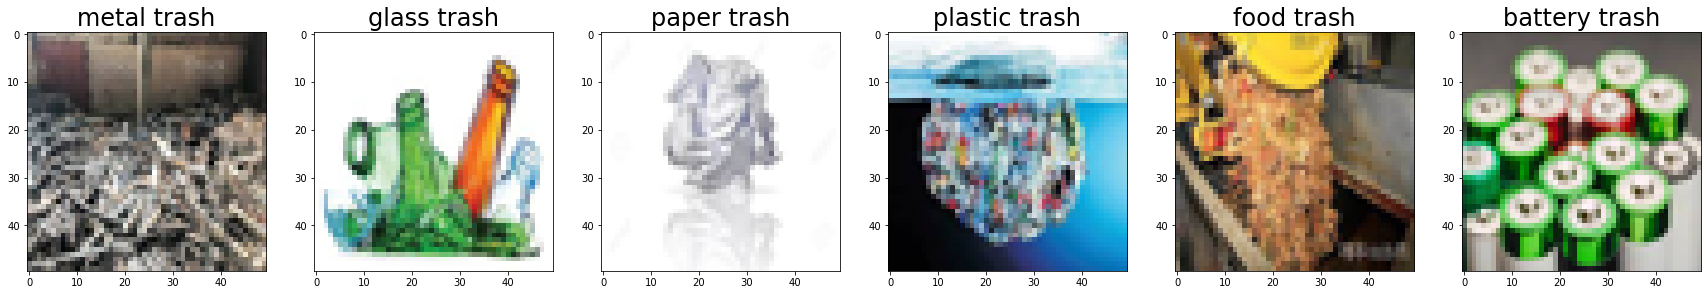

In [29]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img)
plt.title('metal trash', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img)
plt.title('glass trash', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img)
plt.title('paper trash', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img)
plt.title('plastic trash', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img)
plt.title('food trash', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img)
plt.title('battery trash', fontsize=24)
plt.show()

In [30]:
allmetalimg = []
allglassimg = []
allpaperimg = []
allplasticimg = []
allfoodimg = []
allbatteryimg = []

metal_len = len(os.listdir('./trashdatametal/'))
for i in range(metal_len):
    a = Image.open('./trashdatametal/metal'+str(i)+'.png')
    allmetalimg.append(np.array(a).reshape(-1,50*50)[0].tolist())

glass_len = len(os.listdir('./trashdataglass/'))
for j in range(glass_len):
    b = Image.open('./trashdataglass/glass'+str(j)+'.png')
    allglassimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
paper_len = len(os.listdir('./trashdatapaper/'))
for o in range(paper_len):
    c = Image.open('./trashdatapaper/paper'+str(o)+'.png')
    allpaperimg.append(np.array(c).reshape(-1,50*50)[0].tolist())

plastic_len = len(os.listdir('./trashdataplastic/'))
for f in range(plastic_len):
    d = Image.open('./trashdataplastic/plastic'+str(f)+'.png')
    allplasticimg.append(np.array(d).reshape(-1,50*50)[0].tolist())

food_len = len(os.listdir('./trashdatafood/'))
for g in range(food_len):
    e = Image.open('./trashdatafood/food'+str(g)+'.png')
    allfoodimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

battery_len = len(os.listdir('./trashdatabattery/'))
for k in range(battery_len):
    q = Image.open('./trashdatabattery/battery'+str(k)+'.png')
    allbatteryimg.append(np.array(q).reshape(-1,50*50)[0].tolist())

In [31]:
print('메탈 쓰레기 : ', len(allmetalimg))
print('유리 쓰레기 : ', len(allglassimg))
print('종이 쓰레기 : ', len(allpaperimg))
print('플라스틱 쓰레기 : ', len(allplasticimg))
print('음식 쓰레기 : ', len(allfoodimg))
print('건전지 쓰레기 : ', len(allbatteryimg))

메탈 쓰레기 :  28
유리 쓰레기 :  27
종이 쓰레기 :  26
플라스틱 쓰레기 :  22
음식 쓰레기 :  27
건전지 쓰레기 :  30


In [32]:
allimgplus=np.row_stack((allmetalimg, allglassimg, allpaperimg, allplasticimg, allfoodimg, allbatteryimg))
allimgplus.shape

(160, 2500)

In [33]:
target1=np.array([0]*metal_len)
target2=np.array([1]*glass_len)
target3=np.array([2]*paper_len)
target4=np.array([3]*plastic_len)
target5=np.array([4]*food_len)
target6=np.array([5]*battery_len)

In [34]:
target=np.concatenate([target1, target2, target3, target4, target5, target6])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [35]:
allimgplus

array([[151, 148, 148, ...,  44,  36,  67],
       [253, 253, 253, ...,  94,  82, 119],
       [185, 187, 215, ..., 195, 228, 184],
       ...,
       [255, 255, 255, ..., 107, 172,   9],
       [ 80,  78,  59, ..., 159, 101, 192],
       [255, 255, 255, ...,  99, 107, 222]])

In [ ]:
# 스케일링
allimgplus=allimgplus/255.0

allimgplus=allimgplus.reshape(-1,50,50,1)

In [ ]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(allimgplus, target,
                                                    random_state=42,
                                                    stratify=target)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

## 모델

In [ ]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,1)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 100, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
plt.imshow(x_val[3].reshape(50,50), cmap='gray')
plt.title(f'Label - {y_val[3]}')
plt.show()